In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'Advertising_DataSet_ISL.csv', 'Advertising_Sales_Revenue_Analysis.ipynb', 'Crimes.csv', 'Crime_Analysis.ipynb', 'Pactera EDGE Hackathon Questions_v2.docx', 'python_exercise.py', 'Untitled.ipynb']


In [3]:
dataset=pd.read_csv("Advertising_DataSet_ISL.csv")

In [4]:
dataset.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
dataset=dataset.set_index("Unnamed: 0")

In [6]:
dataset.head(5)

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
# Here checking datatypes of each features.
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
# Univariate Analysis of Each Features:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
dataset.skew(axis = 0)

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [13]:
dataset.kurtosis(axis = 0)

TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.408869
dtype: float64

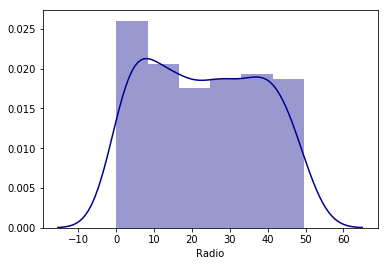

In [18]:
sns.distplot(dataset['Radio'], hist=True, kde=True, color='darkblue')

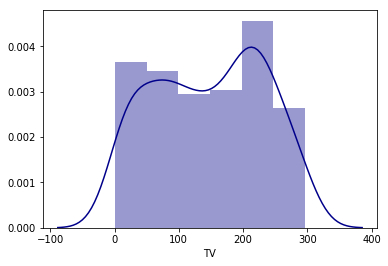

In [19]:
sns.distplot(dataset['TV'], hist=True, kde=True, color='darkblue')

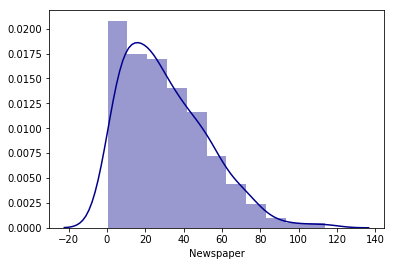

In [20]:
sns.distplot(dataset['Newspaper'], hist=True, kde=True, color='darkblue')

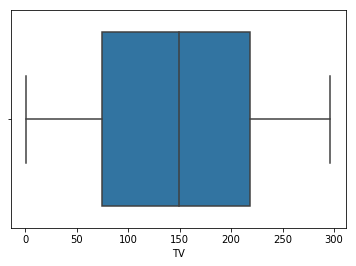

In [21]:
sns.boxplot(x=dataset["TV"])

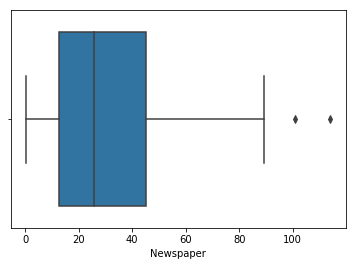

In [22]:
sns.boxplot(x=dataset['Newspaper'])

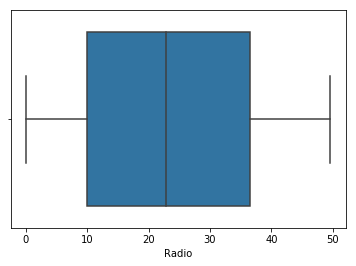

In [23]:
sns.boxplot(x=dataset['Radio'])

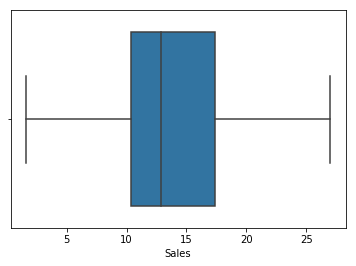

In [24]:
sns.boxplot(x=dataset["Sales"])

In [25]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


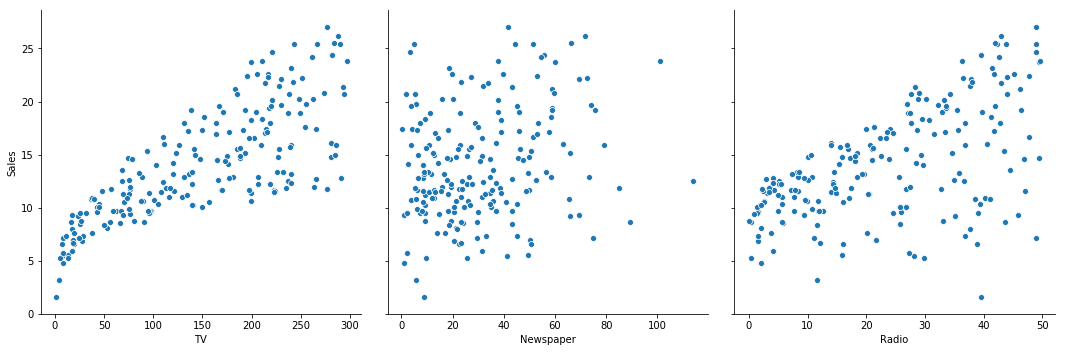

In [27]:
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

In [28]:
dataset.corr('spearman')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.056123,0.050840,0.800614
Radio,0.056123,1.000000,0.316979,0.554304
Newspaper,0.050840,0.316979,1.000000,0.194922
Sales,0.800614,0.554304,0.194922,1.000000


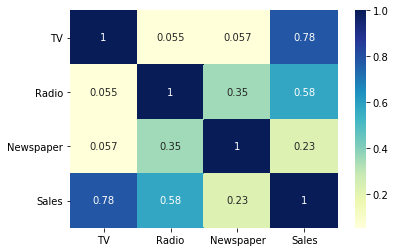

In [29]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [35]:
dataset['Newspaper'].quantile(q=0.25)

12.750000000000002

In [37]:
dataset['Newspaper'].quantile(q=0.75)

45.1

In [38]:
IQR_Newspaper=(dataset['Newspaper'].quantile(q=0.75))-((dataset['Newspaper'].quantile(q=0.25)))

In [39]:
IQR_Newspaper

32.35

In [40]:
from scipy.stats import iqr

iqr(dataset['Newspaper'])

32.35

In [46]:
dataset=dataset[~(dataset['Newspaper']>(dataset['Newspaper'].quantile(q=0.75))+1.5*IQR_Newspaper)]

In [47]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


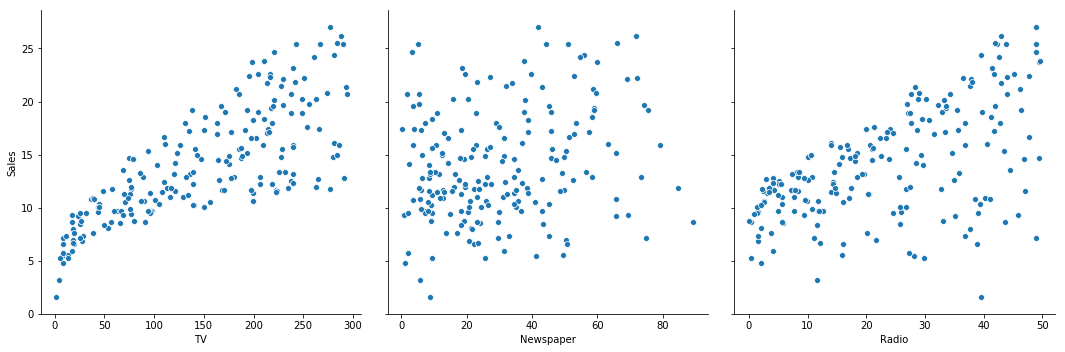

In [48]:
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

In [54]:
x_dataset=dataset[['TV','Radio','Newspaper']]
y_dataset=dataset['Sales']

In [55]:
x_dataset.head(5)

,TV,Radio,Newspaper
Unnamed: 0,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
X_train.head()

,TV,Radio,Newspaper
Unnamed: 0,,,
76,16.9,43.7,89.4
4,151.5,41.3,58.5
186,205.0,45.1,19.6
28,240.1,16.7,22.9
92,28.6,1.5,33.0


In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.8942020722691499
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.1s finished


In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.8942015316160681
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [68]:
accuracy=grid_result.score(X_test,y_test)

In [69]:
accuracy

0.8605357073756406